<a href="https://colab.research.google.com/github/golladivy/OIBSIP-Data-Analytics/blob/main/Customer_Segmentation_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set_style('darkgrid')

In [6]:
#Read the csv file
df = pd.read_csv('/content/Online_Retail.csv', encoding='latin1')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [7]:
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/10 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/10 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/10 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/10 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/10 8:34,1.69,13047.0,United Kingdom


In [8]:
df.tail(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/11 12:50,4.95,12680.0,France


In [9]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [11]:
df = df.rename(columns={'InvoiceNo':'INV_NO','StockCode':'S_CODE','Description':'DESC','Quantity':'QUANTITY','InvoiceDate':'INV_DATE','UnitPrice':'UNIT_PRICE','CustomerID':'CUST_ID'})
df

,INV_NO,S_CODE,DESC,QUANTITY,INV_DATE,UNIT_PRICE,CUST_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/11 12:50,4.15,12680.0,France


In [12]:
df.head()

,INV_NO,S_CODE,DESC,QUANTITY,INV_DATE,UNIT_PRICE,CUST_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [13]:
df.shape

(541909, 8)

In [14]:
#check duplicates
Duplicate_rows = df[df.duplicated()]
Duplicate_rows

,INV_NO,S_CODE,DESC,QUANTITY,INV_DATE,UNIT_PRICE,CUST_ID,Country
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,12/1/10 11:45,1.25,17908.0,United Kingdom
527,536409,22866,HAND WARMER SCOTTY DOG DESIGN,1,12/1/10 11:45,2.10,17908.0,United Kingdom
537,536409,22900,SET 2 TEA TOWELS I LOVE LONDON,1,12/1/10 11:45,2.95,17908.0,United Kingdom
539,536409,22111,SCOTTIE DOG HOT WATER BOTTLE,1,12/1/10 11:45,4.95,17908.0,United Kingdom
555,536412,22327,ROUND SNACK BOXES SET OF 4 SKULLS,1,12/1/10 11:49,2.95,17920.0,United Kingdom
...,...,...,...,...,...,...,...,...
541675,581538,22068,BLACK PIRATE TREASURE CHEST,1,12/9/11 11:34,0.39,14446.0,United Kingdom
541689,581538,23318,BOX OF 6 MINI VINTAGE CRACKERS,1,12/9/11 11:34,2.49,14446.0,United Kingdom
541692,581538,22992,REVOLVER WOODEN RULER,1,12/9/11 11:34,1.95,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,12/9/11 11:34,2.10,14446.0,United Kingdom


In [15]:
Duplicate_rows.shape

(5268, 8)

In [16]:
#counts
df.count()

INV_NO        541909
S_CODE        541909
DESC          540455
QUANTITY      541909
INV_DATE      541909
UNIT_PRICE    541909
CUST_ID       406829
Country       541909
dtype: int64

In [17]:
#remove duplicates from dataset
df = df.drop_duplicates()

In [18]:
df.head()

,INV_NO,S_CODE,DESC,QUANTITY,INV_DATE,UNIT_PRICE,CUST_ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


In [19]:
df.count()

INV_NO        536641
S_CODE        536641
DESC          535187
QUANTITY      536641
INV_DATE      536641
UNIT_PRICE    536641
CUST_ID       401604
Country       536641
dtype: int64

In [20]:
#checking null values
df.isnull().sum()

INV_NO             0
S_CODE             0
DESC            1454
QUANTITY           0
INV_DATE           0
UNIT_PRICE         0
CUST_ID       135037
Country            0
dtype: int64

In [21]:
#drop null
df = df.dropna()

In [22]:
df.count()

INV_NO        401604
S_CODE        401604
DESC          401604
QUANTITY      401604
INV_DATE      401604
UNIT_PRICE    401604
CUST_ID       401604
Country       401604
dtype: int64

In [23]:
df.isnull().sum()

INV_NO        0
S_CODE        0
DESC          0
QUANTITY      0
INV_DATE      0
UNIT_PRICE    0
CUST_ID       0
Country       0
dtype: int64

<Axes: xlabel='UNIT_PRICE'>

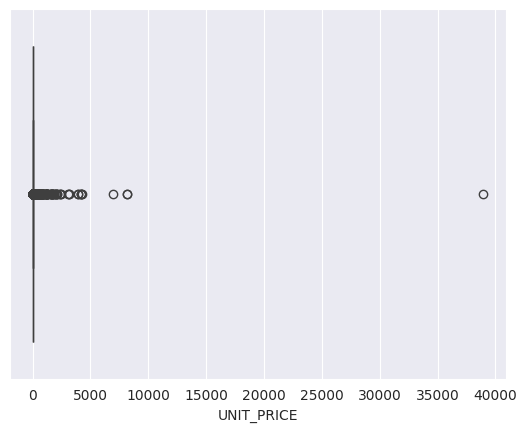

In [24]:
#Detecting Outliers
sns.boxplot(x = df['UNIT_PRICE'])


<Axes: xlabel='QUANTITY'>

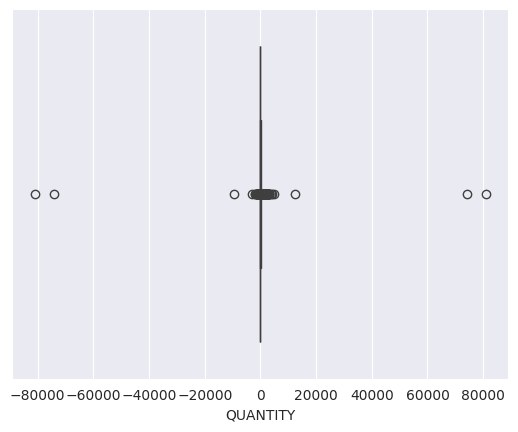

In [25]:
sns.boxplot(x = df['QUANTITY'])

In [26]:
df['CUST_ID'] = df['CUST_ID'].astype('object')

In [27]:
#Analyzing Sales Trends Over Time :
# Assuming 'InvoDt' is the column containing invoice dates
df['INV_DATE'] = pd.to_datetime(df['INV_DATE'])

# Now you can extract month and day of the week
df['Month'] = df['INV_DATE'].dt.month_name()
df['DayOfWeek'] = df['INV_DATE'].dt.day_name()

<ipython-input-27-0baa789f6ab6>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['INV_DATE'] = pd.to_datetime(df['INV_DATE'])


In [28]:
# Monthly sales trend
monthly_sales = df.groupby('Month')['QUANTITY'].sum()

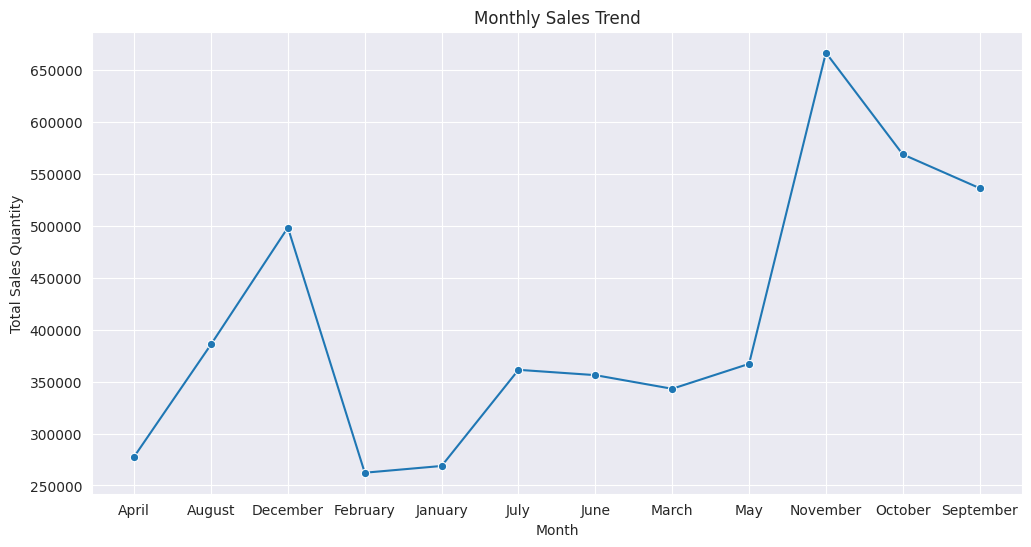

In [29]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Sales Quantity')
plt.title('Monthly Sales Trend')
plt.show()

<ipython-input-30-e7808db4fed8>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='viridis')


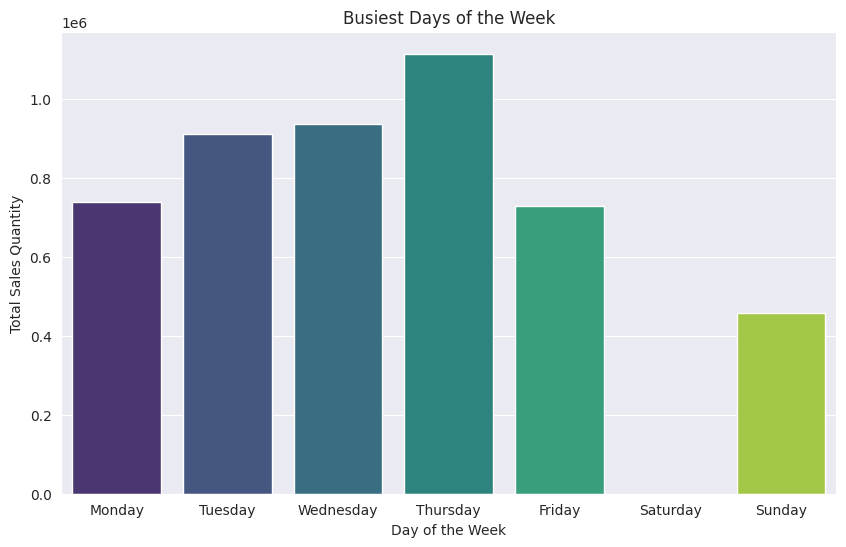

In [30]:
# Busiest days of the week
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekly_sales = df.groupby('DayOfWeek')['QUANTITY'].sum().reindex(day_order)
plt.figure(figsize=(10, 6))
sns.barplot(x=weekly_sales.index, y=weekly_sales.values, palette='viridis')
plt.xlabel('Day of the Week')
plt.ylabel('Total Sales Quantity')
plt.title('Busiest Days of the Week')
plt.show()


<ipython-input-31-9ec6e5a61ad3>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')


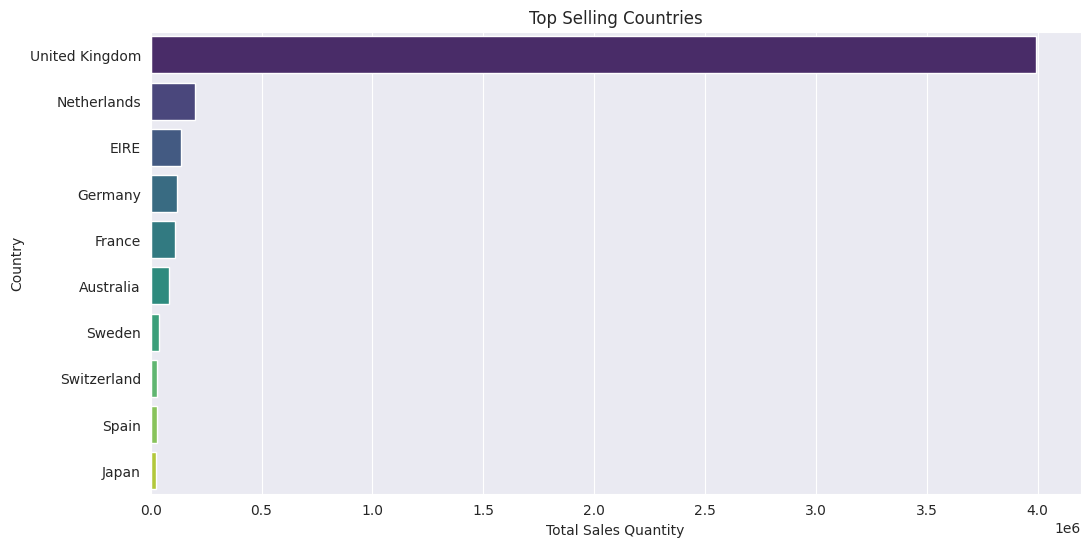

In [31]:
# Top-selling countries
top_countries = df.groupby('Country')['QUANTITY'].sum().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='viridis')
plt.xlabel('Total Sales Quantity')
plt.ylabel('Country')
plt.title('Top Selling Countries')
plt.show()

<ipython-input-32-f7debd6986b4>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['QUANTITY'], palette='viridis')


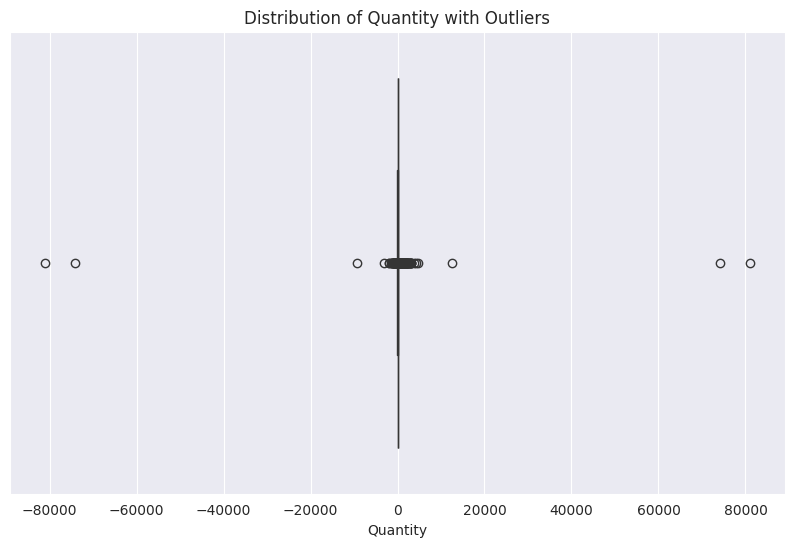

In [32]:
# Boxplot to identify outliers in quantity
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['QUANTITY'], palette='viridis')
plt.xlabel('Quantity')
plt.title('Distribution of Quantity with Outliers')
plt.show()